In [1]:
# IMPORTING NECESSARY LIBRARY:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings # Used to supressed the warnings
warnings.filterwarnings('ignore')

In [2]:
#LOAD DATA FOR EXPLOTARY DATA ANALYSIS
data = pd.read_excel('INX_Future_Inc_Employee_Performance_Data.xls')
pd.set_option('display.max_columns',None) # Used to display the all features

In [3]:
#BASIC CHECKS OF DATA
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [4]:
data.shape
#Dataset contain total 28 features with 1 unique feature and 1200 observation.

(1200, 28)

In [5]:
#EXAMINE THE DATA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [6]:
#STATISTICAL MEASURE OF DATA
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [7]:
data.describe(include="O")

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


DEPARTMENT WISE PERFORMANCE RATING
PLOT USED

Violinplot: It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared.
CountPlot: countplot is used to Show the counts of observations in each categorical bin using bars.

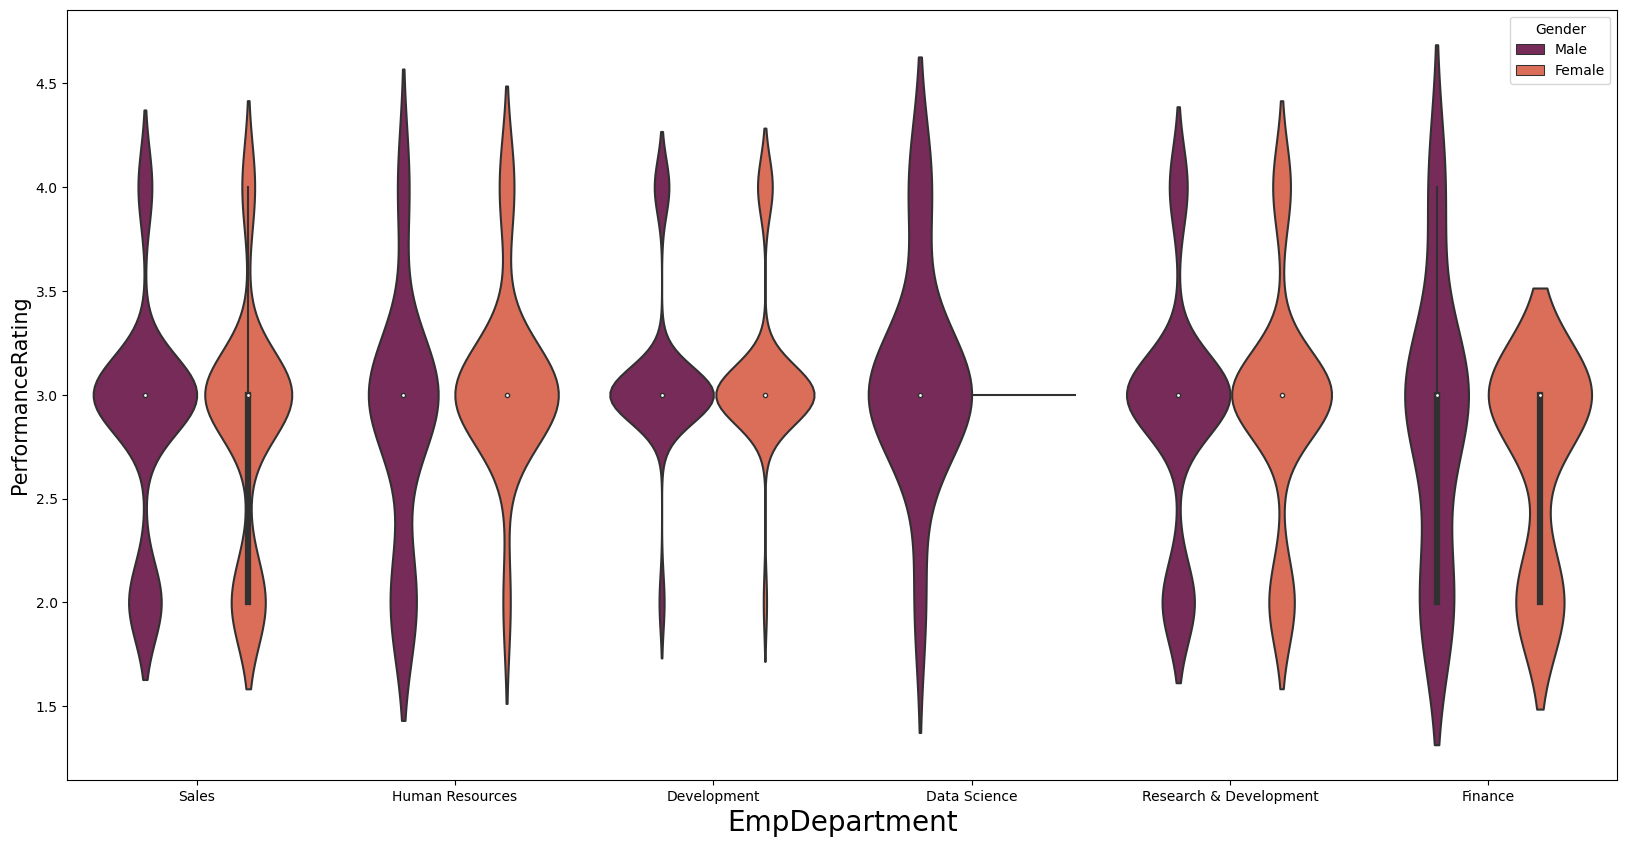

In [8]:
plt.figure(figsize=(20,10),facecolor='white')
sns.violinplot(x='EmpDepartment',y='PerformanceRating',hue=data.Gender,data=data,palette='rocket')
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

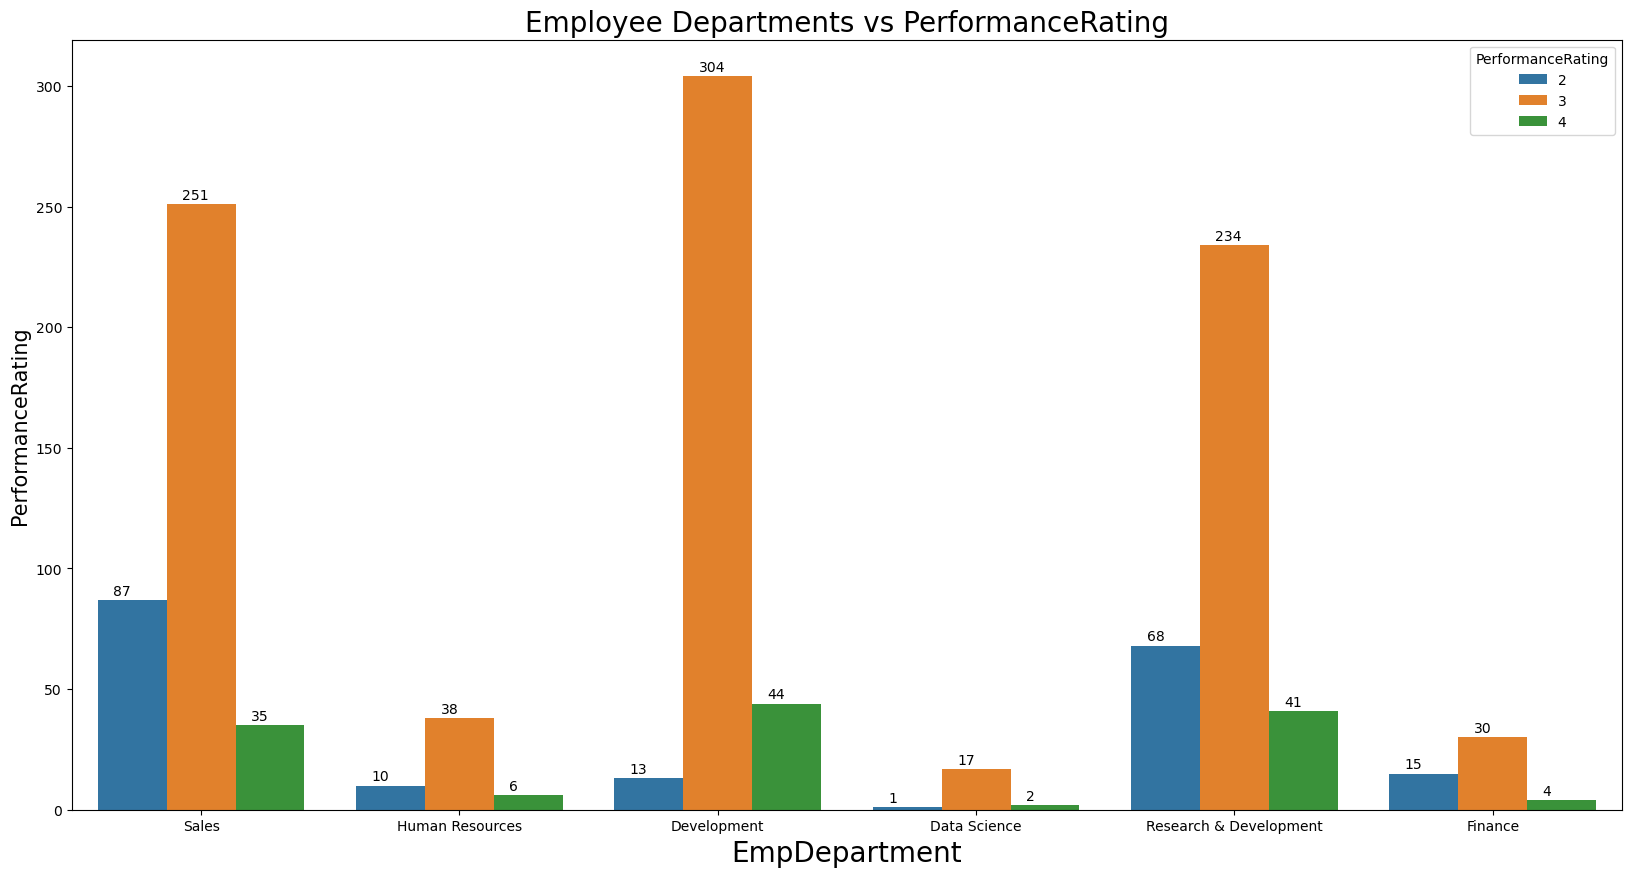

In [9]:
plt.figure(figsize=(20,10),facecolor='white')
ax = sns.countplot(x='EmpDepartment',hue=data.PerformanceRating,data=data)
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.06, i.get_height()+2))
plt.title('Employee Departments vs PerformanceRating',fontsize=20)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()


Findings:

From the above graph we can conclude that from the EmpDepartment Development department is showing High performance rating

Sales: The Performace rating level 3 is more in the sales department. The male performance rating the little bit higher compared to female.

Human Resources: The majority of the employees lying under the level 3 performance . The older people are performing low in this department. The female employees in HR department doing really well in their performance.

Development: The maximum number of employees are level 3 performers. Employees of all age are performing at the level of 3 only. The gender-based performance is nearly same for both.

Data Science: The highest average of level 3 performance is in data science department. Data science is the only department where less number of level 2 performers. The overall performance is higher compared to all departments. Male employees are doing good in this department.

Research & Development: The age factor is not deviating from the level of performance here where different employees with different age are there in every level of performance. The R&D has the good female employees in their performance.

Finance: The finance department performance is exponentially decreasing when age increases. The male employees are doing good. The experience factor is inversely relating to the performance level.

In [10]:
#PERCENT COUNT IN EMPLOYEE DEPARTMENT WITH PERFORMANCE RATING
percent = pd.crosstab(data["PerformanceRating"], data["EmpDepartment"], margins=True,normalize=True)
round(percent.multiply(100),2)

EmpDepartment,Data Science,Development,Finance,Human Resources,Research & Development,Sales,All
PerformanceRating,,,,,,,
2,0.08,1.08,1.25,0.83,5.67,7.25,16.17
3,1.42,25.33,2.50,3.17,19.50,20.92,72.83
4,0.17,3.67,0.33,0.50,3.42,2.92,11.00
All,1.67,30.08,4.08,4.50,28.58,31.08,100.00


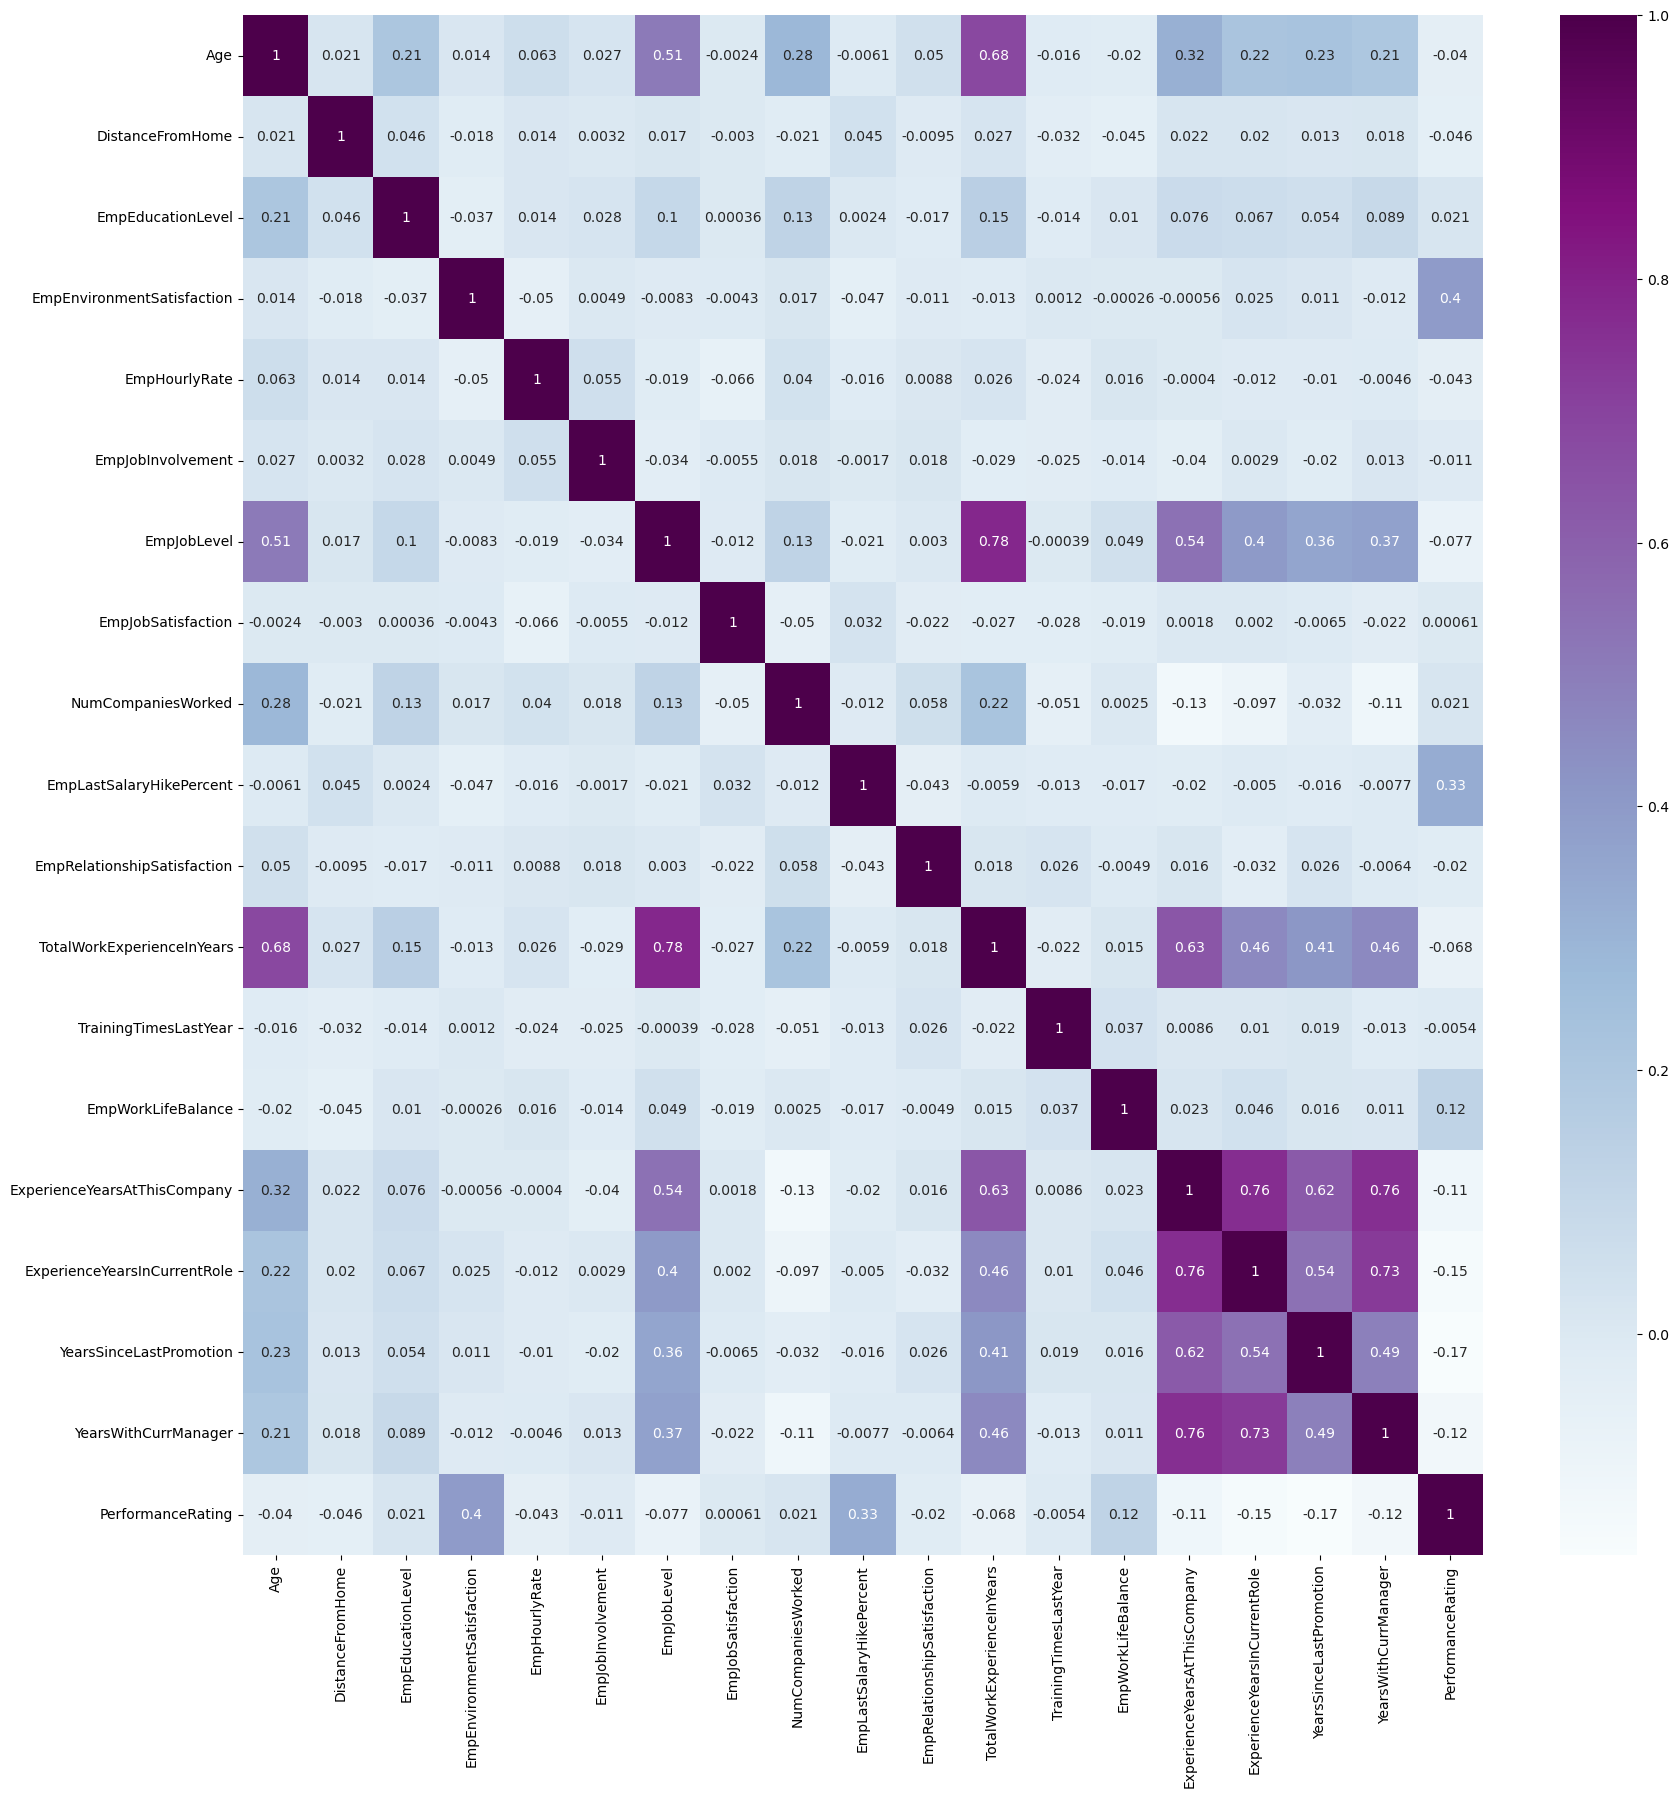

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='BuPu')
plt.show()

TOP 3 FACTOR AFFECTING TO THE EMPLOYEE PERFORMANCE
From visualisation file we get the top 3 factor affecting to the employee performance

Emp Environment Satisfaction
Emp Last Salary Hike Percent
Emp Work Life Balance

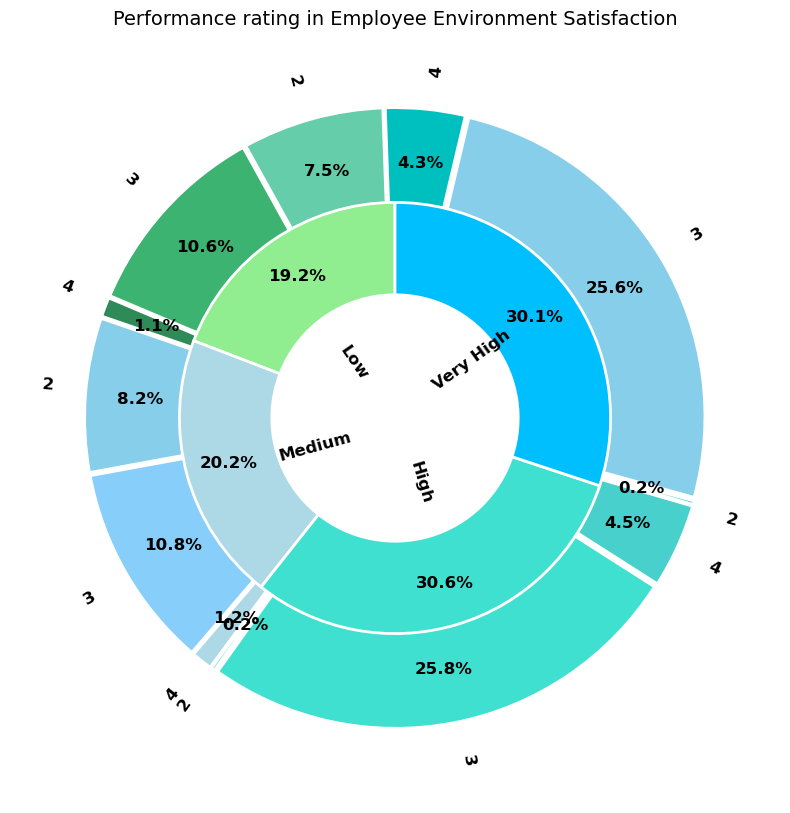

In [12]:
# 1.Employee enviorment Satisfaction
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.title("Performance rating in Employee Environment Satisfaction", fontsize=14, loc='center')

# Outer pie chart
plt.pie([90, 127, 13, 98, 130, 14, 3, 310, 54, 3, 307, 51], radius=1,
        colors=["mediumaquamarine", "mediumseagreen", "seagreen",
                "skyblue", "lightskyblue", 'lightblue',
                'turquoise', 'turquoise', 'mediumturquoise',
                'c', 'skyblue', 'c'],
        explode=[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
        labels=[2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4],
        rotatelabels=True, pctdistance=0.82, textprops={"fontsize": 12, "fontweight": "bold"}, startangle=92,
        wedgeprops=dict(width=0.6, edgecolor='w', linewidth=3),
        autopct='%.1f%%')  # Add autopct parameter to show percentage labels

# Inner pie chart
plt.pie([230, 242, 367, 361], radius=0.7,
        colors=['lightgreen', 'lightblue', "turquoise", "deepskyblue"],
        wedgeprops=dict(width=0.3, edgecolor='w', linewidth=2),
        textprops={"fontsize": 12, "fontweight": "bold"},
        autopct='%.1f%%',
        labels=["Low", "Medium", "High", "Very High"],
        pctdistance=0.80, labeldistance=0.2, rotatelabels=True, startangle=90)

plt.show()

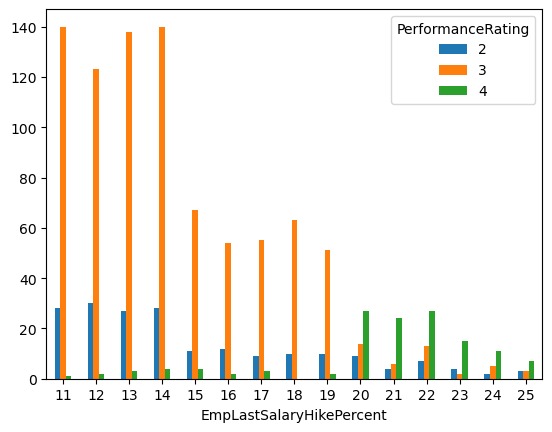

In [13]:
# 2.Employee last salary hike percent
crosstb=pd.crosstab(data['EmpLastSalaryHikePercent'],data['PerformanceRating'])
crosstb
barplot = crosstb.plot.bar(rot=0)

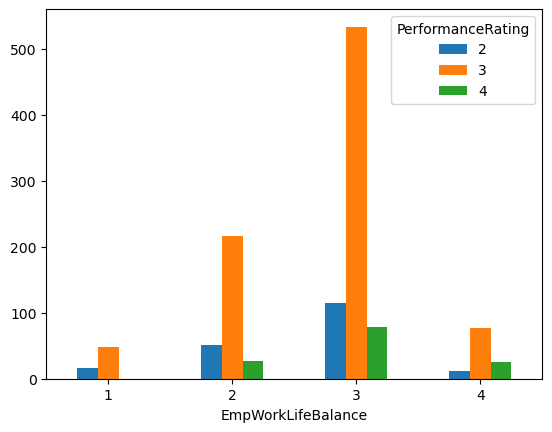

In [14]:
# 3.Employee Work life balance
crosstbb = pd.crosstab(data['EmpWorkLifeBalance'],data['PerformanceRating'])
barplot = crosstbb.plot.bar(rot=0)

Findings:

1.Employee Enviroment satisfaction:
Maximum Number of Employees Performance Rating belongs to EmpEnvironmentSatisfaction Level 3 & Level 4, It contains 367 & 361.

2.Employee last salary hike percent:
More Number of Employees whose salary hike percentage belongs to 11-19 % are getting 2 & 3 performance rating Maximum time.
Employees whose salary hike percentage is in between 20-22%, There performance rating is 4.

3.Employee work life balance:
In EmpWorkLifeBalance, level 3 is showing high Performance Rating of employees.

In [15]:
'''CHECKING THE DISTRIBUTION OF CONTINUOUS FEATURE
Numerical features are continupus in nature to understand their distribution we plot distplot.
Distplot: Distplot is used to observe how the data is distributed in a particular dataset.'''

# Get the continuous features
data.select_dtypes('int64').head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,32,10,3,4,55,3,2,4,1,12,4,10,2,2,10,7,0,8,3
1,47,14,4,4,42,3,2,1,2,12,4,20,2,3,7,7,1,7,3
2,40,5,4,4,48,2,3,1,5,21,3,20,2,3,18,13,1,12,4
3,41,10,4,2,73,2,5,4,3,15,2,23,2,2,21,6,12,6,3
4,60,16,4,1,84,3,2,1,8,14,4,10,1,3,2,2,2,2,3


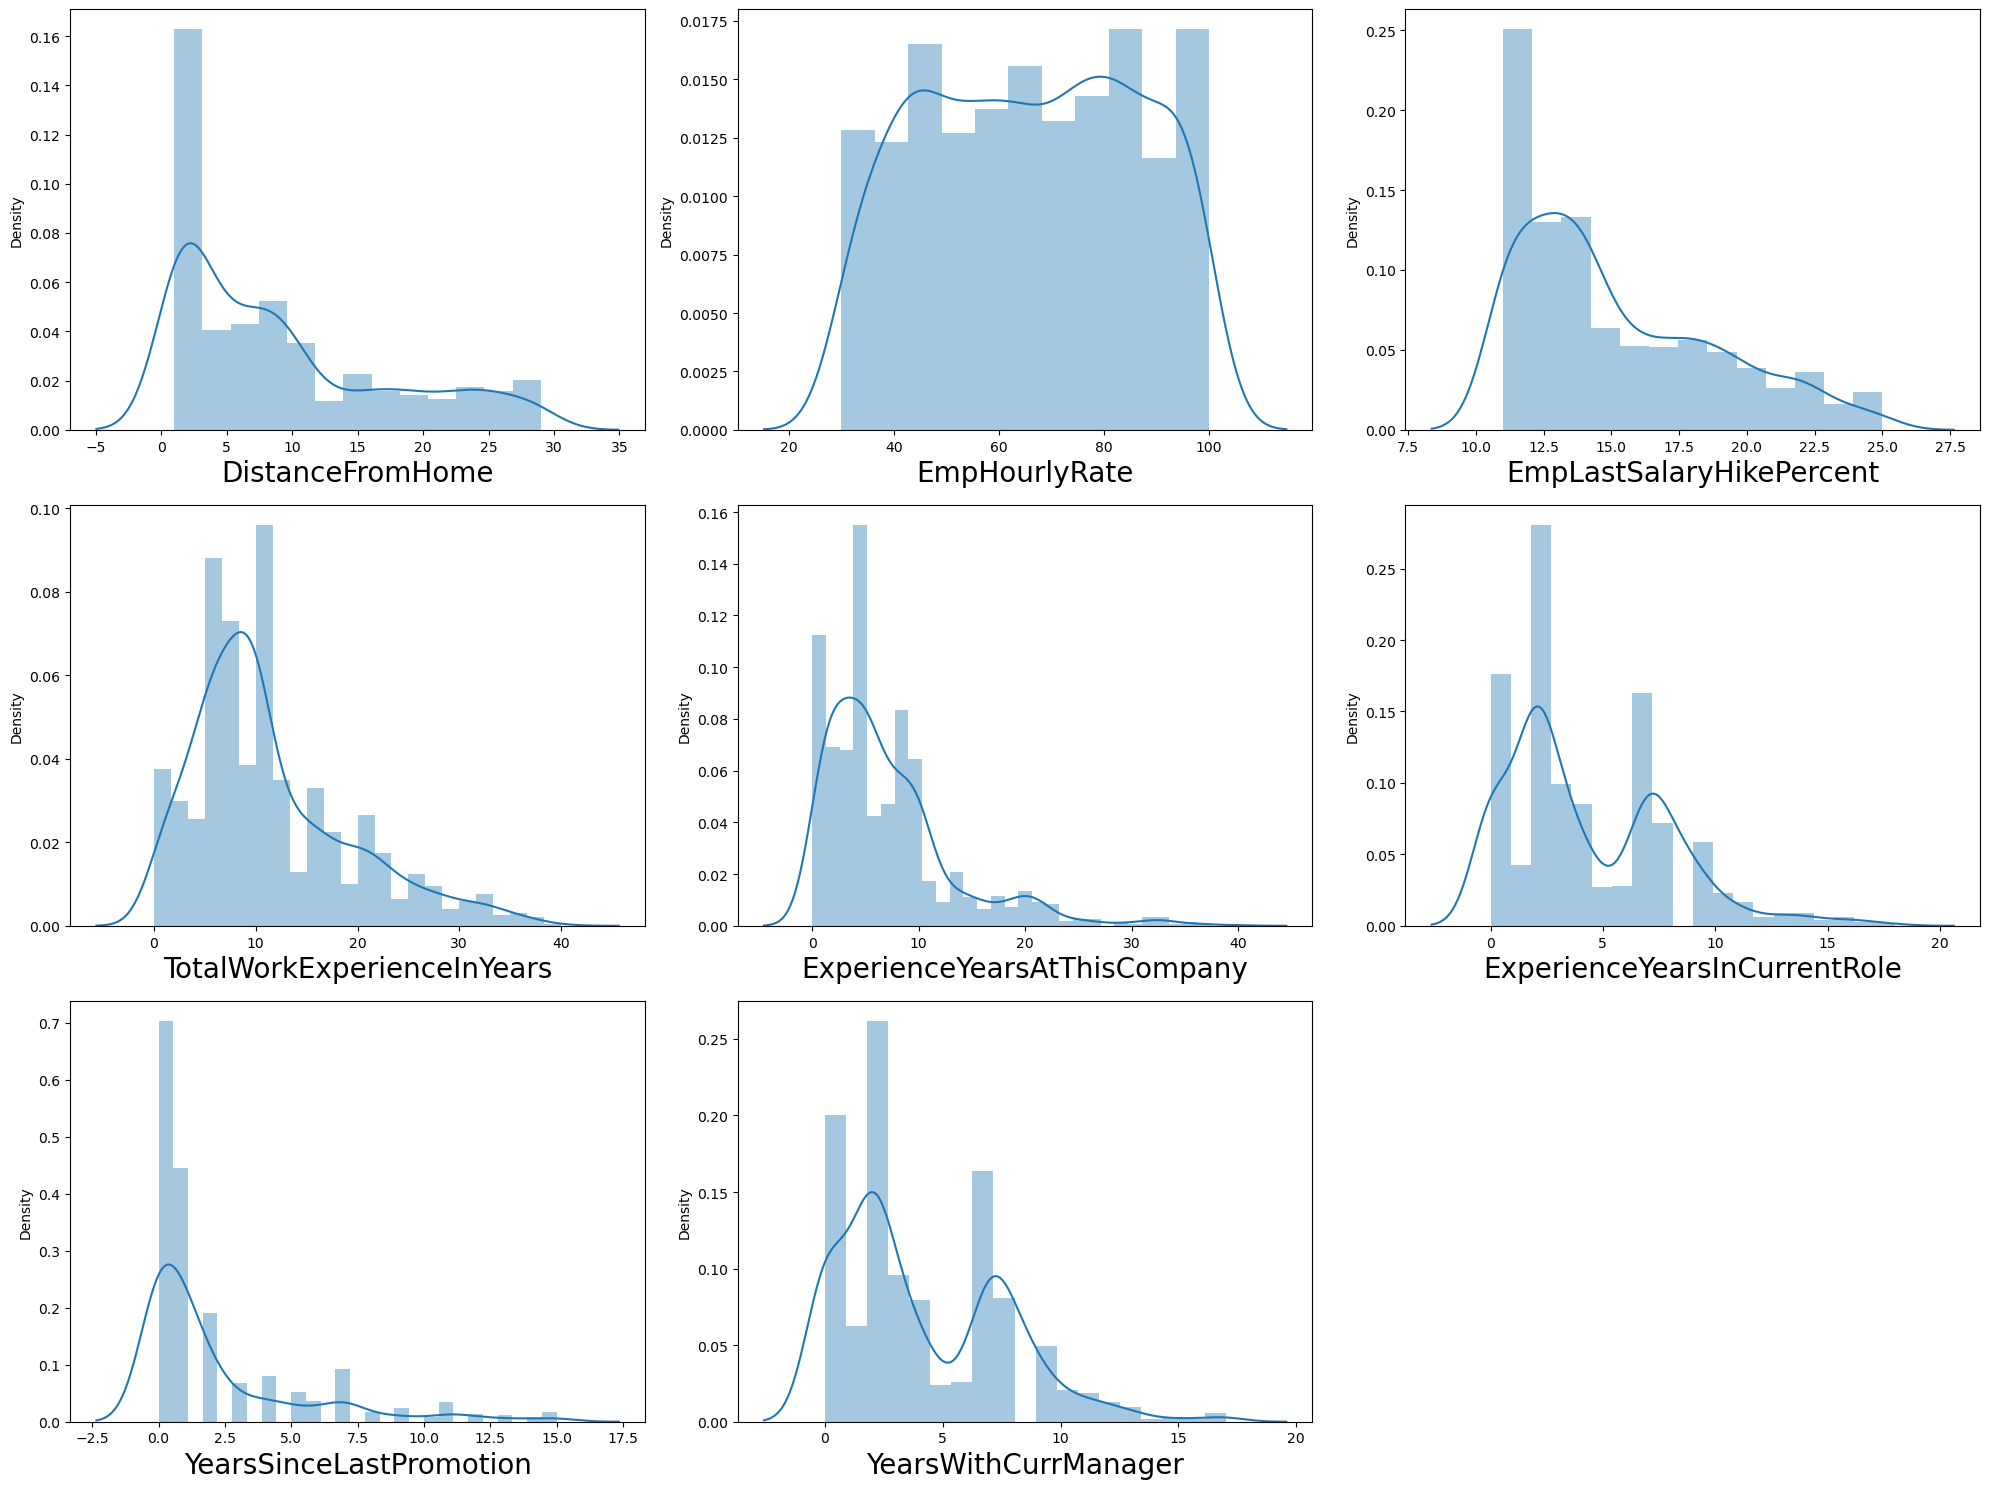

In [16]:
# Make a list of continuous feature in nature
continuous = data[['DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
                   'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,15)) # defining canvas size
plotno = 1 # counter

for column in continuous: # iteration of columns / acessing the columns from count 
    if plotno<=8:    # set the limit
        plt.subplot(3,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.distplot(x=continuous[column]) # Plotting dist plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

In [17]:
# checking for skewness in numerical columns for feature transformation.
columns = continuous
neg_skewed = []
pos_skewed = []

# Iterate over the columns and calculate skewness
for column in columns:
    skewness = data[column].skew()
    if skewness < -1:
        neg_skewed.append((column, skewness))
    elif skewness > 1:
        pos_skewed.append((column, skewness))

# Print the results
print("Negatively skewed columns:")
for column, skewness in neg_skewed:
    print(f"{column}: {skewness}")

print("\nPositively skewed columns:")
for column, skewness in pos_skewed:
    print(f"{column}: {skewness}")

Negatively skewed columns:

Positively skewed columns:
TotalWorkExperienceInYears: 1.0868618597364565
ExperienceYearsAtThisCompany: 1.789054979919473
YearsSinceLastPromotion: 1.9749315589155791


We will be considering two features ExperienceYearsAtThisCompany and YearsSinceLastPromotion for feature transformation since both features are highly positively skewed.

In [18]:
columns = continuous

# Initialize empty lists to store leptokurtic, mesokurtic, and platykurtic column names
leptokurtic = []
mesokurtic = []
platykurtic = []

# Iterate over the columns and calculate kurtosis
for column in columns:
    kurt = data[column].kurtosis()
    if kurt > 3:
        leptokurtic.append((column, kurt))
    elif kurt < 3:
        platykurtic.append((column, kurt))
    else:
        mesokurtic.append((column, kurt))

# Print the results
print("Leptokurtic columns:")
for column, kurt in leptokurtic:
    print(f"{column}: {kurt}")

print("\nMesokurtic columns:")
for column, kurt in mesokurtic:
    print(f"{column}: {kurt}")

print("\nPlatykurtic columns:")
for column, kurt in platykurtic:
    print(f"{column}: {kurt}")

Leptokurtic columns:
ExperienceYearsAtThisCompany: 4.057959404441291
YearsSinceLastPromotion: 3.5390800793468817

Mesokurtic columns:

Platykurtic columns:
DistanceFromHome: -0.24201677636189256
EmpHourlyRate: -1.1868905128360532
EmpLastSalaryHikePercent: -0.29974077544117517
TotalWorkExperienceInYears: 0.8056333333819827
ExperienceYearsInCurrentRole: 0.4380286874251209
YearsWithCurrManager: 0.14820164456972984


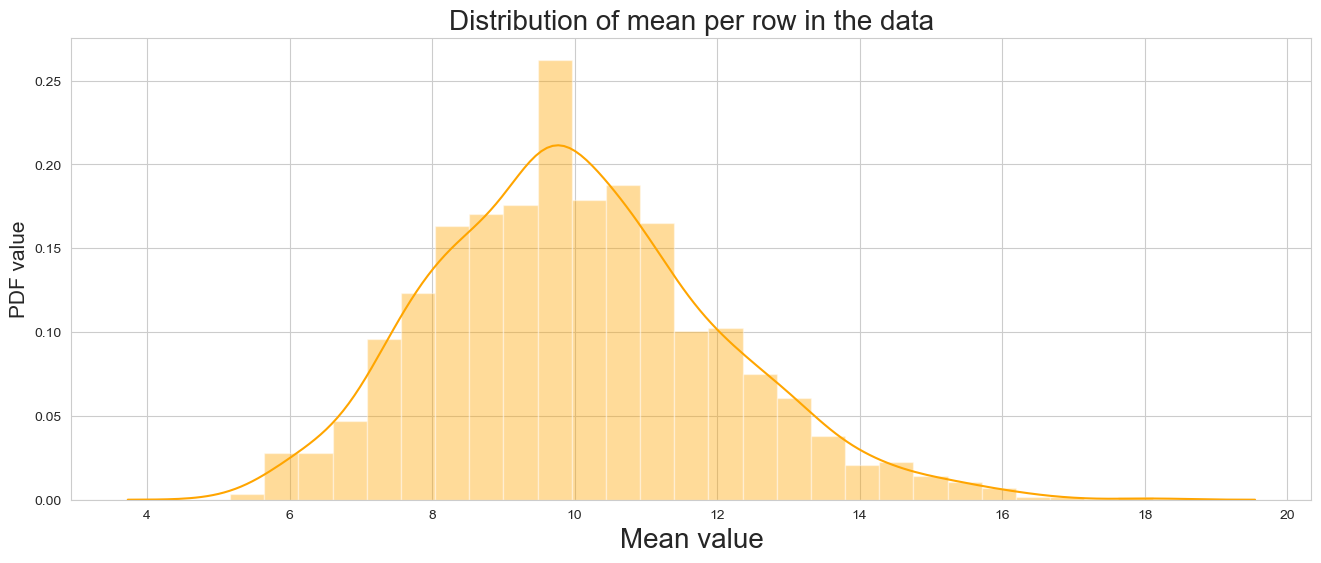

In [19]:
#DISTRIBUTION OF MEAN OF DATA
plt.figure(figsize=(16,6))
sns.set_style('whitegrid')
features = data.columns.values[0:27]
plt.title('Distribution of mean per row in the data',fontsize=20)
plt.xlabel('Mean value',fontsize=20)
plt.ylabel('PDF value',fontsize=15)
sns.distplot(data[features].mean(axis=1),color='ORANGE', kde=True)
plt.show()

Findings:

From the above graph data is close to guassian distribution with mean value 9.5
From above graph we can say that around 80% feature mean lies between 8.5 to 10.5

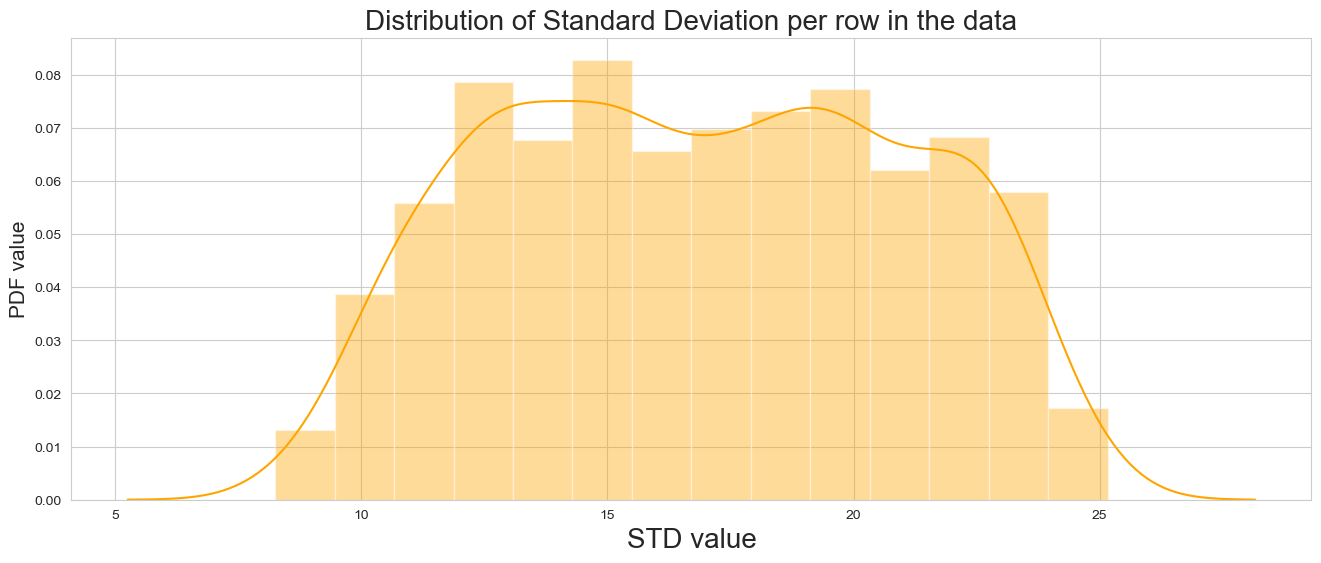

In [20]:
#DISTRIBUTION OF STANDARD DEVIATION OF DATA
plt.figure(figsize=(16,6))
sns.set_style('whitegrid')
features = data.columns.values[0:27]
plt.title('Distribution of Standard Deviation per row in the data',fontsize=20)
plt.xlabel('STD value',fontsize=20)
plt.ylabel('PDF value',fontsize=15)
sns.distplot(data[features].std(axis=1),color='ORANGE', kde=True)
plt.show()

Findings:

This graph also look like guassian distribution around 30% of feature standard deviation around the range of 13 to 20 and remaining 70% feature standard deviation in between 0 to 2